# **DATA CLEANING NOTEBOOK**

## Objectives

* Clean input data
  * Add 3 variables: 'Damage', 'Amount', 'Day of week'
  * Replace missing variables, and group: 'Vict Sex', 'Vict Descent', 'Premis Cd' and 'Premis Desc', 'Weapon used Cd' and 'Weapon Desc', 'Cross Street'
  * Dropping variables: DR_NO/Date Rptd/Rpt Dist No/Part 1-2/Mocodes/Status/Status Desc/Crm Cd 1/Crm Cd 2/Crm Cd 3/Crm Cd 4
* Save data

## Inputs

* The input data is a csv file called Crime_Data_from_2020_to_Present.csv
* We also use a csv file, created just for this case, called "Crm Cd Desc analyses.csv"

## Outputs

* The output data is a csv file called dataPP5.csv 

## Additional Comments

* ...


---

# Change working directory

* access the current directory
* make the parent of the current directory the new current directory

In [3]:
import os
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
current_dir

'/workspace/PP5_My_project'

---

# Load Data

In [2]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/dataPP5.csv")
df.head(3)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474


---

# Add variables: 'Day of week', 'Amount', 'Damage'

## 'Day of week'

We are adding this variable because it might be usefull later on.

Start by checking the type, and convert to datetime.

In [3]:
# Check 'DATE OCC' type
checktype = type(df['DATE OCC'].iloc[0])
print(checktype)
# Convert 'DATE OCC' to datetime
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
checktype2 = type(df['DATE OCC'].iloc[0])
print(checktype2)

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


/tmp/ipykernel_7618/449201402.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')


Proceed with finding out the day of the week 

In [4]:
# Extract the day of the week (Monday=0, Sunday=6) and add 1 to make Monday=1, Sunday=7
df['Day of Week'] = df['DATE OCC'].dt.weekday + 1

# Display the first few rows to check
print(df[['DATE OCC', 'Day of Week']].head())

df.head()


    DATE OCC  Day of Week
0 2020-01-08            3
1 2020-01-01            3
2 2020-02-13            4
3 2020-01-01            3
4 2020-01-01            3


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Day of Week
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,3
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,3
2,200110444,04/14/2020 12:00:00 AM,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,4
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,3
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,3


## 'Amount'

We are interested in max variable. We are adding this variable because it might be usefull later on.

In [5]:
# Load the damage done, amount file
dfCrimDescription = pd.read_csv("inputs/datasets/raw/Crm_Cd_Desc_analyses.csv", delimiter=";")
dfCrimDescription.head(3)

,Crm Cd Desc,min $,max $,Crm Cd
0,DOCUMENT WORTHLESS ($200 & UNDER)',1,200,652
1,VANDALISM - MISDEAMEANOR ($399 OR UNDER)',201,399,745
2,DOCUMENT WORTHLESS ($200.01 & OVER)',201,399,651


Merge Crm Cd

In [6]:
# List of columns to merge
crm_cd_columns = ['Crm Cd', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4']

# Initialize a new 'Amount' column in df with 0
df['Amount'] = 0

# Loop through each 'Crm Cd' column to fetch 'max $' from dfCrimeDescription
for col in crm_cd_columns:
    if col in df.columns:
        # Merge the current 'Crm Cd' column with dfCrimeDescription
        merged_df = df.merge(dfCrimDescription[['Crm Cd', 'max $']], left_on=col, right_on='Crm Cd', how='left')
        # Update the 'Amount' column with values from the merged result
        df['Amount'] = merged_df['max $'].combine_first(df['Amount'])

# Display the first few rows to verify
print(df[['Crm Cd', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Amount']].head())

   Crm Cd  Crm Cd 1  Crm Cd 2  Crm Cd 3  Crm Cd 4  Amount
0     624     624.0       NaN       NaN       NaN     0.0
1     624     624.0       NaN       NaN       NaN     0.0
2     845     845.0       NaN       NaN       NaN     0.0
3     745     745.0     998.0       NaN       NaN   399.0
4     740     740.0       NaN       NaN       NaN   900.0


Now if '2046' is to be found in 'Mocodes' in df, then the value of 'Amount' should be 50000

In [7]:
# Define te list of specific 'Mocodes'
mocodes_list = ['2046']

# Filter rows where any Mocode in the list is found in the 'Mocodes' column
df.loc[df['Mocodes'].notna() & df['Mocodes'].apply(lambda x: isinstance(x, str) and any(code in x.split() for code in mocodes_list)), 'Amount'] = 50000

Checking Amount colonne new data, should get 9 different amount

In [8]:
# Get the unique values and their counts
unique_values_amount = df['Amount'].value_counts()

# Sort in ascending order and print the 20 lowest values
highest_20_values_amount = unique_values_amount.sort_values(ascending=False).head(20)
print(highest_20_values_amount)

Amount
0.0        322095
20000.0    143645
950.0       86229
10000.0     72587
2000.0      60451
900.0       46831
399.0       21024
50000.0        25
200.0          24
Name: count, dtype: int64


Verify df columns

In [9]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Day of Week,Amount
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,3,0.0
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,3,0.0
2,200110444,04/14/2020 12:00:00 AM,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,4,0.0
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,3,399.0
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,3,900.0


## 'Damage'

now we want to add, in a new column 'Damage', '1'(yes) if 'Amount' <> '0' and '0'(no) if not

In [10]:
# Create a new 'Damage' column: 1 if 'Amount' is different from 0, else 0
df['Damage'] = df['Amount'].apply(lambda x: 1 if x != 0 else 0)

# Display 
print(df[['Amount', 'Damage']].head)

<bound method NDFrame.head of          Amount  Damage
0           0.0       0
1           0.0       0
2           0.0       0
3         399.0       1
4         900.0       1
...         ...     ...
752906  20000.0       1
752907    900.0       1
752908      0.0       0
752909      0.0       0
752910    399.0       1

[752911 rows x 2 columns]>


---

# Replace missing variables, and group

## 'Vict Sex'

In [11]:
# Replace 'H' and '-' with 'X'
df['Vict Sex'].replace({'H': 'X', '-': 'X'}, inplace=True)

# Replace NaN values with 'X'
df['Vict Sex'].fillna('X', inplace=True)

# Display 
print(df['Vict Sex'].unique())

['F' 'M' 'X']


## 'Vict Descent'

In [12]:
# Replace 'O' and '-' with 'X'
df['Vict Descent'].replace({'O': 'X', '-': 'X'}, inplace=True)

# Replace NaN values with 'X'
df['Vict Descent'].fillna('X', inplace=True)

# Count the values to confirm
descent_count = df['Vict Descent'].value_counts()

# Display
print(descent_count)

Vict Descent
H    231206
X    229176
W    154519
B    108140
A     16447
K      4003
F      3137
C      2829
J      1057
V       764
I       717
Z       367
P       205
U       155
D        51
G        50
L        46
S        42
Name: count, dtype: int64


## 'Premis Cd' and 'Premis Desc'

In [13]:
# Check the type of 'Premis Cd'
print(df['Premis Cd'].dtype)

# Replace NaN in 'Premis Cd' with '116'
df['Premis Cd'].fillna(116, inplace=True)

# Replace NaN in 'Premis Desc' with 'OTHER/OUTSIDE'
df['Premis Desc'].fillna('OTHER/OUTSIDE', inplace=True)

# Verify the changes by checking for any remaining NaN values
print(df[['Premis Cd', 'Premis Desc']].isna().sum())

float64
Premis Cd      0
Premis Desc    0
dtype: int64


## 'Weapon used Cd' and 'Weapon Desc'

In [14]:
# Check the type of 'Premis Cd'
print(df['Weapon Used Cd'].dtype)

# Replace NaN in 'Weapon used Cd' with 999
df['Weapon Used Cd'].fillna(999, inplace=True)

# Replace NaN in 'Weapon Desc' with 'NO WEAPON'
df['Weapon Desc'].fillna('NO WEAPON', inplace=True)

# Verify the changes by checking for any remaining NaN values
print(df[['Weapon Used Cd', 'Weapon Desc']].isna().sum())


float64
Weapon Used Cd    0
Weapon Desc       0
dtype: int64


## 'Cross Street'

In [15]:
# Replace NaN in 'Weapon Desc' with 'NO WEAPON'
df['Cross Street'].fillna('NO CROSS STREET', inplace=True)

# Verify the changes by checking for any remaining NaN values
print(df[['Cross Street']].isna().sum())

Cross Street    0
dtype: int64


---

# Dropping variables

We do not need those variables since they do not bring any further usefull value (that we want to use):
DR_NO/Date Rptd/Rpt Dist No/Part 1-2/Mocodes/Status/Status Desc/Crm Cd 1/Crm Cd 2/Crm Cd 3/Crm Cd 4

In [16]:
# List of columns to drop
columns_to_drop = ['DR_NO', 'Date Rptd', 'Rpt Dist No', 'Part 1-2', 'Mocodes', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4']

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Verify
print(df.head())

    DATE OCC  TIME OCC  AREA    AREA NAME  Crm Cd  \
0 2020-01-08      2230     3    Southwest     624   
1 2020-01-01       330     1      Central     624   
2 2020-02-13      1200     1      Central     845   
3 2020-01-01      1730    15  N Hollywood     745   
4 2020-01-01       415    19      Mission     740   

                                         Crm Cd Desc  Vict Age Vict Sex  \
0                           BATTERY - SIMPLE ASSAULT        36        F   
1                           BATTERY - SIMPLE ASSAULT        25        M   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE         0        X   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)        76        F   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        31        X   

  Vict Descent  Premis Cd                                   Premis Desc  \
0            B      501.0                        SINGLE FAMILY DWELLING   
1            H      102.0                                      SIDEWALK   
2    

---

# Checking new data

In [18]:
df.info()
# Variable containing missing data
missing_data = df.columns[df.isna().sum() > 0].to_list()
missing_data
from ydata_profiling import ProfileReport
if missing_data:
    profile = ProfileReport(df=df[missing_data], minimal=True)
    profile.to_notebook_iframe()
else:
    print("There are no variables with missing data")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752911 entries, 0 to 752910
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE OCC        752911 non-null  datetime64[ns]
 1   TIME OCC        752911 non-null  int64         
 2   AREA            752911 non-null  int64         
 3   AREA NAME       752911 non-null  object        
 4   Crm Cd          752911 non-null  int64         
 5   Crm Cd Desc     752911 non-null  object        
 6   Vict Age        752911 non-null  int64         
 7   Vict Sex        752911 non-null  object        
 8   Vict Descent    752911 non-null  object        
 9   Premis Cd       752911 non-null  float64       
 10  Premis Desc     752911 non-null  object        
 11  Weapon Used Cd  752911 non-null  float64       
 12  Weapon Desc     752911 non-null  object        
 13  LOCATION        752911 non-null  object        
 14  Cross Street    752911 non-null  obj

---

## Skewness and kurtosis analysis

A quick recap

* Skewness is the asymmetry of the data. A distribution is symmetric when it looks the same to the left and right of the centre point. It is horizontally mirrored. Positive Skewness happens when the tail on the right side is longer. Negative skewness is the opposite.
* Kurtosis relates to the tails of the distribution. It is a measure of outliers in the distribution. A negative kurtosis indicates the distribution has thin tails. Positive kurtosis indicates that the distribution is peaked and has thick tails.

In [4]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/dataPP5_cleaned.csv")
df.head(3)

,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LOCATION,Cross Street,LAT,LON,Day of Week,Amount,Damage
0,2020-01-08,2230,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,NO CROSS STREET,34.0141,-118.2978,3,0.0,0
1,2020-01-01,330,1,Central,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,NO CROSS STREET,34.0459,-118.2545,3,0.0,0
2,2020-02-13,1200,1,Central,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,999.0,NO WEAPON,200 E 6TH ST,NO CROSS STREET,34.0448,-118.2474,4,0.0,0


*** TIME OCC ***


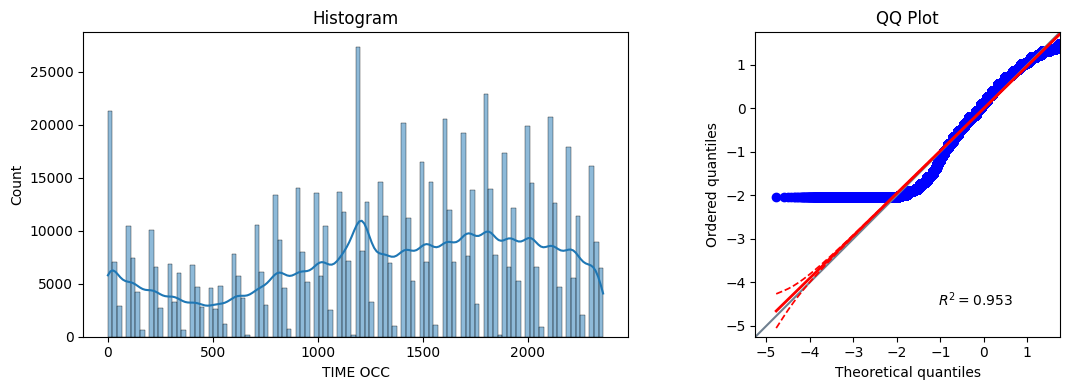

calculation | skewness: -0.43 | kurtosis: -0.8


*** AREA ***


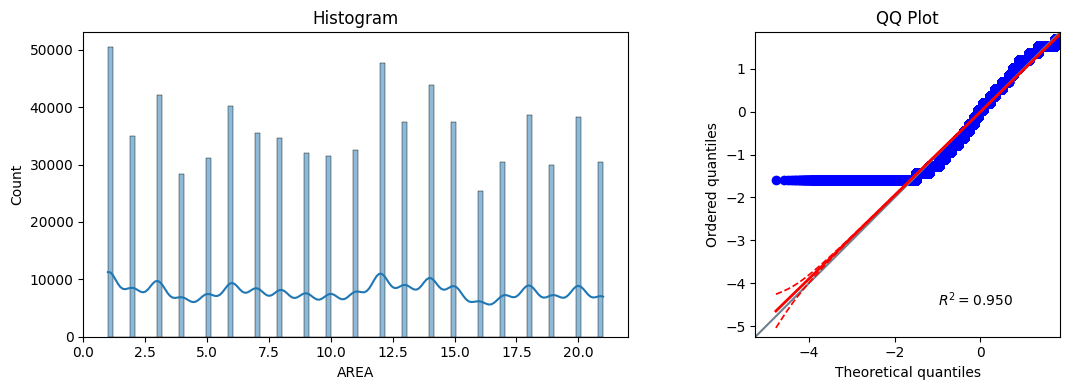

calculation | skewness: 0.01 | kurtosis: -1.19


*** Crm Cd ***


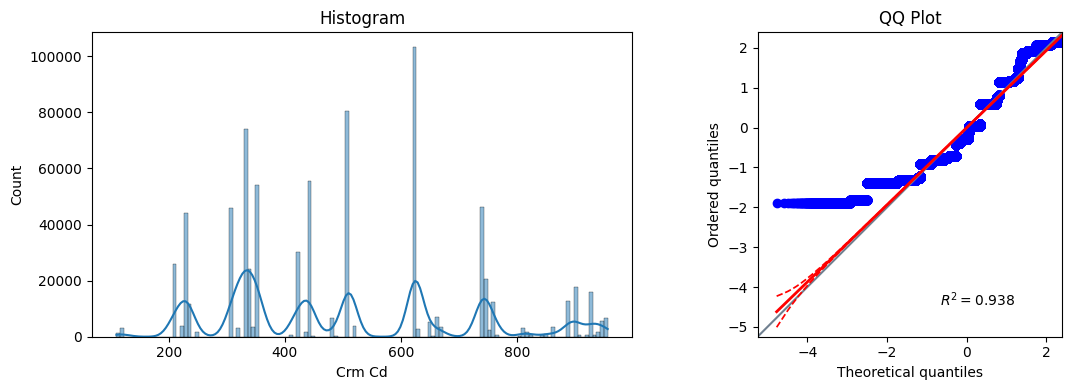

calculation | skewness: 0.49 | kurtosis: -0.76


*** Vict Age ***


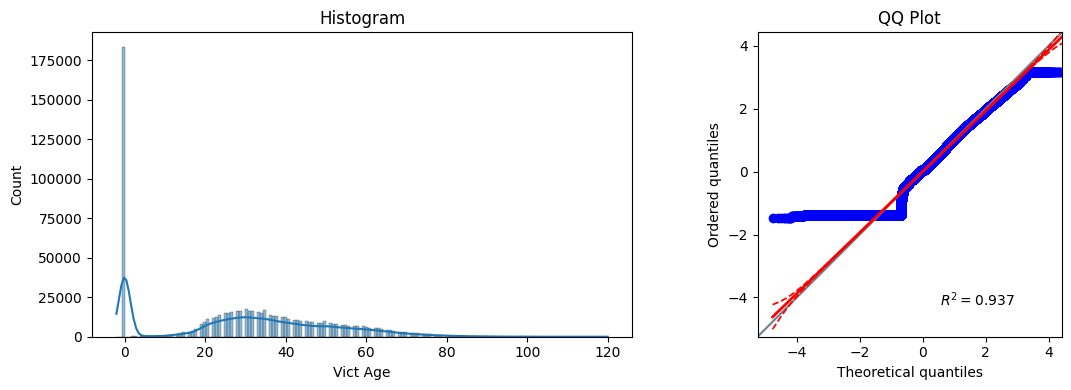

calculation | skewness: 0.11 | kurtosis: -0.74


*** Premis Cd ***


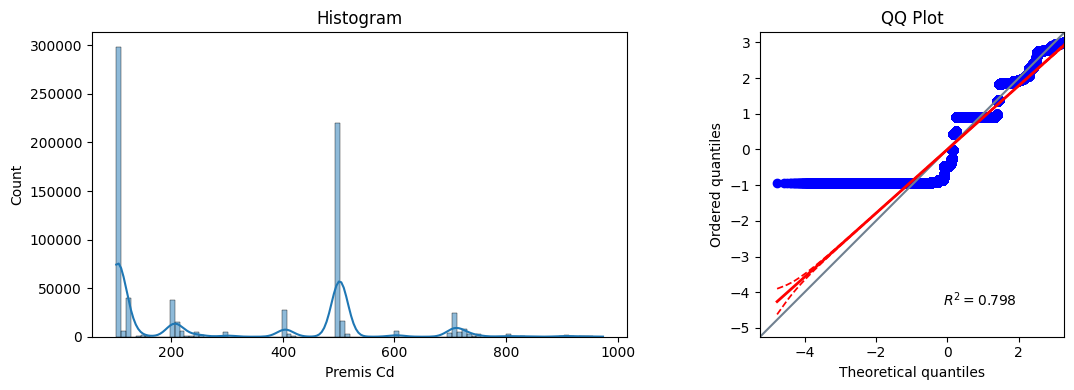

calculation | skewness: 0.52 | kurtosis: -1.05


*** Weapon Used Cd ***


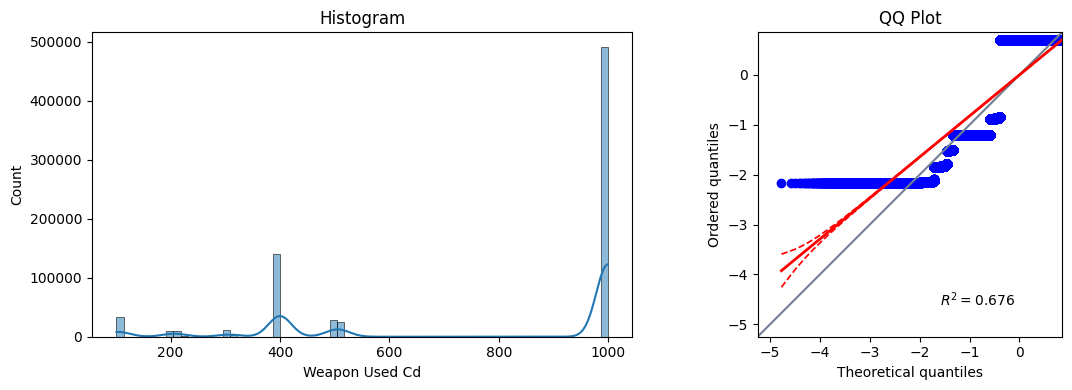

calculation | skewness: -0.83 | kurtosis: -1.02


*** LAT ***


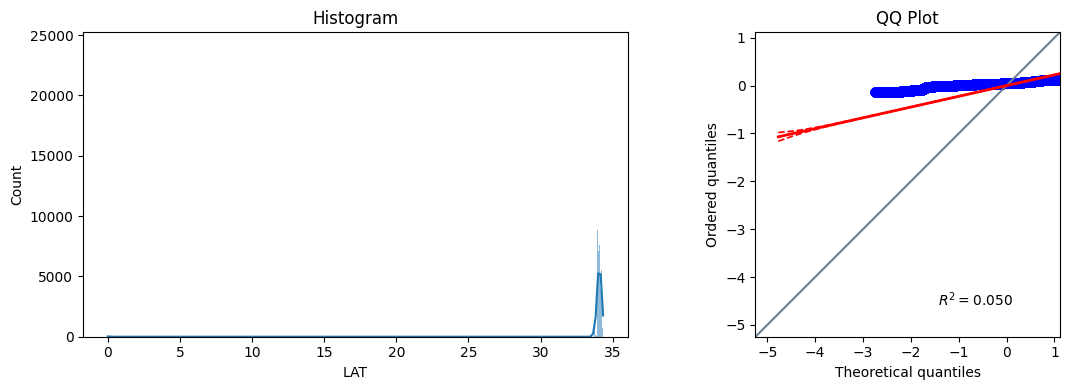

calculation | skewness: -18.05 | kurtosis: 324.95


*** LON ***


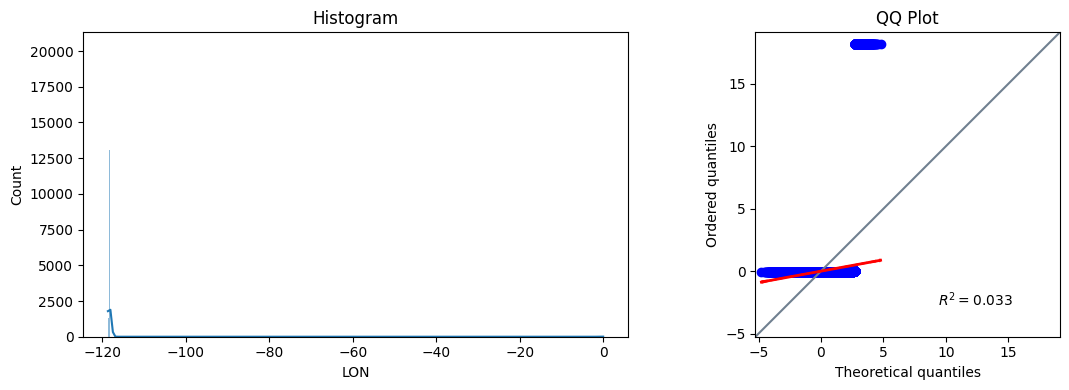

calculation | skewness: 18.14 | kurtosis: 327.1


*** Day of Week ***


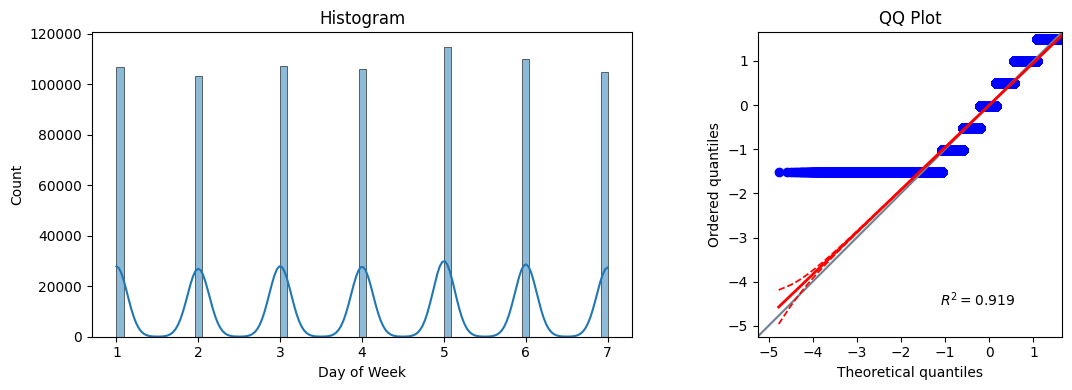

calculation | skewness: -0.03 | kurtosis: -1.24


*** Amount ***


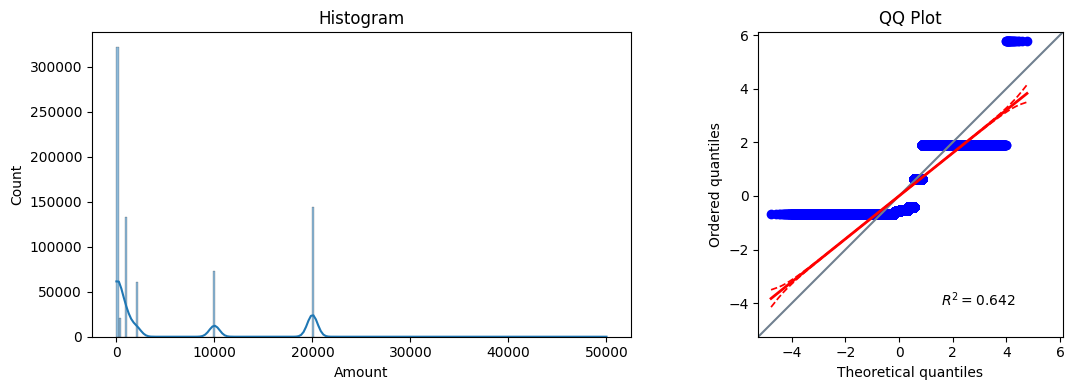

calculation | skewness: 1.21 | kurtosis: -0.27


*** Damage ***


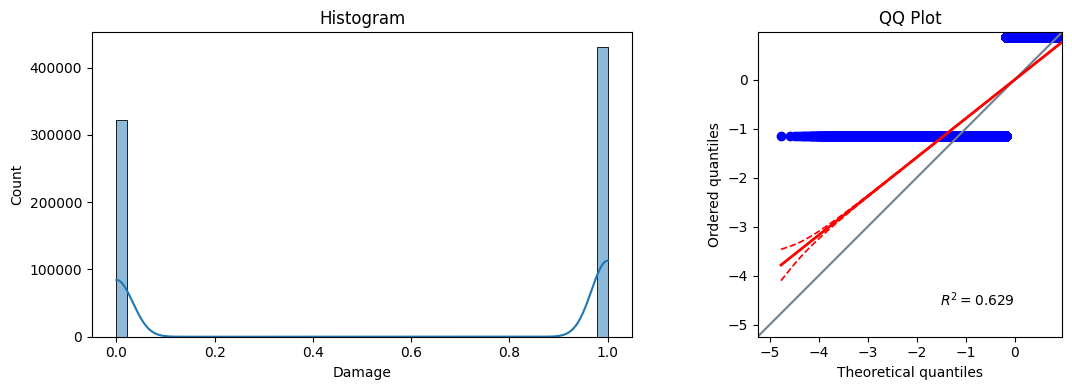

calculation | skewness: -0.29 | kurtosis: -1.91




In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg 
import numpy as np


# Define a function to calculate skewness and kurtosis for each column
def calculate_skew_kurtosis(df, col, moment):
    skewness = df[col].skew().round(2)
    kurtosis = df[col].kurtosis().round(2)
    print(f"{moment} | skewness: {skewness} | kurtosis: {kurtosis}")

# Define a function to plot the distributions and QQ plots for numeric columns
def distribution_skew_kurtosis(df):
    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    for col in numeric_columns:
        print(f"*** {col} ***")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

        # Histogram with KDE plot
        sns.histplot(data=df, x=col, kde=True, ax=axes[0])
        axes[0].set_title("Histogram")

        # QQ plot
        pg.qqplot(df[col].dropna(), dist='norm', ax=axes[1]) # handling missing values in case I decide to handle it differently and forget about here
        axes[1].set_title("QQ Plot")

        plt.tight_layout()
        plt.show()

        # Calculate and print skewness and kurtosis
        calculate_skew_kurtosis(df, col, 'calculation')
        print("\n")

# Call the function to study the distributions
distribution_skew_kurtosis(df)

---

# Push files to Repo in a new file

In [20]:
import os
df.to_csv(f"outputs/datasets/collection/dataPP5_cleaned.csv",index=False)

---

# Conclusion and next step

We prepared the data for next step which is the study of correlation, by adding necessary information, by merging data, by changing some existing and missing data, by dropping unnecessary data.

We saved cleaned data into a new file